In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
gtrain = pd.read_csv("genes_train.csv")
gtest = pd.read_csv("genes_test.csv")

In [4]:
gtrain.groupby("cancer type").count()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient
cancer type,,,,,,,,,,,,,,,,,,,,,
ALL,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
AML,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [5]:
gtrain.shape

(40, 7131)

PART 1 QUESTION 3

The training data has 40 patients, which represents 55% of the 72 patients, and 7131 features. Comparing the number of features to the number of patients, there are many more features (genes), so the data is imbalanced.

PART 1 QUESTION 4 

From the training data, 29 have ALL and 11 have AML, so the data is imbalanced. 

In [6]:
gtrain.max(axis=1)

0     31086
1     29288
2     28056
3     31449
4     29543
5     38467
6     41911
7     40065
8     23602
9     28033
10    25966
11    30546
12    30797
13    28519
14    30256
15    27268
16    28952
17    32645
18    33143
19    27358
20    33548
21    39558
22    36417
23    27983
24    32785
25    31614
26    31261
27    29833
28    30354
29    25055
30    28350
31    25093
32    32946
33    28698
34    61228
35    37164
36    32204
37    29169
38    45815
39    29136
dtype: int64

In [7]:
gtrain.min(axis=1)

0    -19826
1    -17930
2    -27182
3    -23396
4    -10339
5    -21658
6    -24024
7    -27570
8    -25171
9    -12500
10   -17480
11   -15256
12   -12854
13   -14937
14   -13380
15   -10492
16   -19523
17    -8692
18   -11572
19   -13838
20    -7397
21   -17179
22   -14937
23   -17368
24   -17377
25   -10652
26   -20406
27   -20376
28    -9501
29   -17580
30   -25491
31   -28400
32   -27811
33   -17310
34   -16281
35   -27398
36   -23673
37   -23645
38   -21984
39   -21296
dtype: int64

In [8]:
gtrain.mean(axis=1)

0     641.277279
1     690.149790
2     698.210379
3     600.901543
4     679.438289
5     564.719355
6     584.356662
7     571.280084
8     789.604208
9     599.400421
10    632.166760
11    492.532819
12    674.563815
13    648.522581
14    705.682188
15    624.492847
16    791.292987
17    557.489902
18    558.555820
19    954.292006
20    577.572230
21    524.687798
22    532.180926
23    662.077279
24    597.783450
25    603.232398
26    501.277279
27    673.188920
28    556.389201
29    718.837868
30    598.569285
31    676.830435
32    723.466620
33    618.776578
34    514.429453
35    775.039832
36    689.156662
37    626.803366
38    582.118794
39    527.750912
dtype: float64

PART 1 QUESTION 5 

The maximum, minimum, and mean are far apart (i.e. the maximum is in the positive ten-thousands while the minimum is in the negative ten-thousands and the mean is in the hundreds), so this is a problem because this means the data is likely not on the same scale and any intermediate values will be less influential to the model, even if they are actually influential to the patients' diagnoses.

Based on the far apart maximum, minimum, and mean, yes we need to scale the data.

In [9]:
x_train = gtrain.drop(["cancer type","patient"],axis=1)
y_train = gtrain["cancer type"]
x_test = gtest.drop(["cancer type","patient"],axis=1)
y_test = gtest["cancer type"]

PART 1 QUESTION 6 

I will drop cancer type and patient from the x data, and the y output will be cancer type.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_StdScaled = scaler.fit_transform(x_train)
x_test_StdScaled = scaler.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_StdScaled, y_train)
y_pred = model.predict(x_test_StdScaled)

from sklearn import metrics

print("Training Score: ", model.score(x_train_StdScaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  1.0
Accuracy:  0.75
[[18  0]
 [ 8  6]]


PART 1 QUESTION 7B

The score of the model on the training data is 1.0, the accuracy is 0.75, and the confusion matrix is 18 true ALL, 0 false ALL, 8 false AML, and 6 true AML.

In [11]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train_StdScaled, y_train)

y_pred = model.predict(x_test_StdScaled)

print("Training Score: ", model.score(x_train_StdScaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  1.0
Accuracy:  0.78125
[[18  0]
 [ 7  7]]


PART 1 QUESTION 7C

The score of the model on the training data is 1.0, the accuracy is 0.78125, and the confusion matrix is 18 true ALL, 0 false ALL, 7 false AML, and 7 true AML.

PART 1 QUESTION 7D

These scores are so low because the test data was also fit to its own mean and standard deviation, so it was scaled differently than the training data although the model was trained on the training data. When the model makes predictions based on the test data, it performs poorly because it was fit to the training data, scaled to the training data. The confusion matrix shows that the model has a tendency to classify ALL as AML.

In [12]:
x_train_scaled = (x_train - x_train.mean())/x_train.std()

In [13]:
x_test_scaled = (x_test - x_train.mean())/x_train.std()

In [14]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

print("Training Score: ", model.score(x_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  1.0
Accuracy:  0.8125
[[18  0]
 [ 6  8]]


In [15]:
model = GaussianNB()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print("Training Score: ", model.score(x_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  1.0
Accuracy:  0.90625
[[16  2]
 [ 1 13]]


PART 1 QUESTION 8C

Yes, scaling the test data using the mean and standard deviation of the training data improves the performance because the model then predicts from the test data, which has been scaled the same way as the training data.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 30).fit(x_train_scaled)
print(pca.explained_variance_ratio_.cumsum())

[0.14160178 0.25887229 0.32470765 0.37114269 0.41593652 0.45377108
 0.49028899 0.52256446 0.55262452 0.57871474 0.60331123 0.62601503
 0.64798886 0.66892235 0.68894065 0.70786795 0.72580368 0.74303738
 0.75991715 0.77579443 0.79135625 0.80636007 0.82059574 0.83464022
 0.84827473 0.86159723 0.87466785 0.88744908 0.89998391 0.91215863]


PART 2 QUESTION 2 

29 principal components are needed to explain 90% of the variance. 

In [17]:
x_train_scaled_pca = pca.transform(x_train_scaled) 
x_test_scaled_pca = pca.transform(x_test_scaled)

In [18]:
model = LogisticRegression()
model.fit(x_train_scaled_pca, y_train)
y_pred = model.predict(x_test_scaled_pca)

print("Training Score: ", model.score(x_train_scaled_pca, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  1.0
Accuracy:  0.78125
[[18  0]
 [ 7  7]]


In [19]:
model = GaussianNB()
model.fit(x_train_scaled_pca, y_train)

y_pred = model.predict(x_test_scaled_pca)

print("Training Score: ", model.score(x_train_scaled_pca, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  0.975
Accuracy:  0.6875
[[18  0]
 [10  4]]


In [21]:
gtrain.corr()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient
AFFX-BioB-5_at (endogenous control),1.000000,0.394806,0.107810,0.044910,0.256461,0.287939,0.045420,0.135167,-0.087513,0.256602,...,-0.216618,-0.205111,0.081200,0.054838,-0.291409,-0.455912,-0.169763,0.236918,0.016602,0.082068
AFFX-BioB-M_at (endogenous control),0.394806,1.000000,0.021829,0.149940,0.184649,0.226400,-0.141140,0.040675,-0.284016,0.081299,...,-0.259786,0.016337,0.029218,0.241478,-0.080732,-0.260019,-0.151625,0.228692,-0.219226,-0.234499
AFFX-BioB-3_at (endogenous control),0.107810,0.021829,1.000000,-0.052345,-0.082733,-0.117796,0.223933,-0.167289,-0.197000,0.210162,...,0.163376,-0.232843,-0.040497,-0.407683,-0.001589,-0.125815,-0.233007,0.074269,-0.070679,0.020126
AFFX-BioC-5_at (endogenous control),0.044910,0.149940,-0.052345,1.000000,0.131487,0.135853,-0.073053,-0.195987,0.057151,0.262966,...,0.255518,-0.048472,-0.020575,0.130047,0.324741,0.171289,0.159012,0.298317,0.009920,0.415532
AFFX-BioC-3_at (endogenous control),0.256461,0.184649,-0.082733,0.131487,1.000000,0.734477,0.140811,0.491790,-0.352711,0.112288,...,-0.112158,0.024336,0.212558,-0.038611,-0.557758,-0.495977,-0.071931,-0.165051,0.117985,0.012680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,-0.455912,-0.260019,-0.125815,0.171289,-0.495977,-0.424628,-0.013621,-0.233563,0.321394,0.018794,...,0.542352,0.129890,-0.197443,0.004781,0.437197,1.000000,0.344643,0.019433,-0.107159,-0.005496
RB1 Retinoblastoma 1 (including osteosarcoma).1,-0.169763,-0.151625,-0.233007,0.159012,-0.071931,-0.136145,-0.230112,0.099527,-0.021242,0.099801,...,0.290280,0.000782,-0.175649,0.164124,0.281617,0.344643,1.000000,0.022261,-0.106242,-0.181030
GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,0.236918,0.228692,0.074269,0.298317,-0.165051,0.001413,-0.201330,-0.234420,0.096372,0.505892,...,-0.110382,0.036799,-0.061365,0.130420,0.409861,0.019433,0.022261,1.000000,0.111479,0.429690
GB DEF = mRNA (clone 1A7),0.016602,-0.219226,-0.070679,0.009920,0.117985,-0.012052,0.140922,-0.010710,-0.063204,0.140181,...,0.155158,-0.083020,0.129868,0.016627,0.094912,-0.107159,-0.106242,0.111479,1.000000,0.127850


PART 2 QUESTION 3

The confusion matrix for the logistic regression model is 18 true ALL, 0 false ALL, 7 false AML, and 7 true AML. The accuracy score for the logistic regression model is 0.78125.

The confusion matrix for the Naive Bayes regression model is 18 true ALL, 0 false ALL, 10 false AML, and 4 true AML. The accuracy score for the logistic regression model is 0.6875.

The accuracy dropped for both the new logistic and Naive Bayes model, and they performed worse in terms of false AML.

I do not think these models are more generalizable to new patients because the accuracy score is much lower than the training score, showing that these models were overfit. The model may perform even worse for more test data (i.e. more patients).

PCA was not appropriate to perform here. I think it lowered the accuracy because the features are not strongly correlated, so transforming them to a new set of axes does not make sense. 

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_bal_train, y_bal_train = sm.fit_resample(x_train_scaled, y_train)
x_bal_test, y_bal_test = sm.fit_resample(x_test_scaled, y_test)

<AxesSubplot:xlabel='cancer type', ylabel='count'>

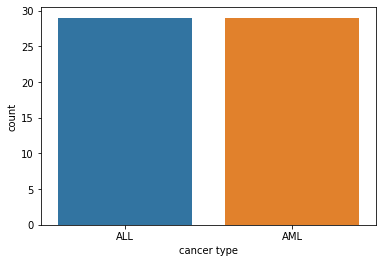

In [29]:
sns.countplot(x=y_bal_train)

<AxesSubplot:xlabel='cancer type', ylabel='count'>

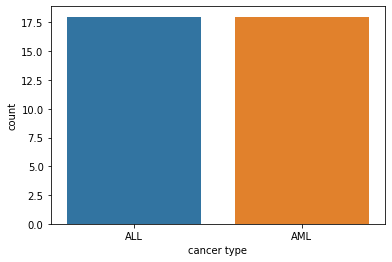

In [30]:
sns.countplot(x=y_bal_test)

PART 3 QUESTION 1

The distribution of ALL and AML is balanced for the training and test data after SMOTE.

In [34]:
model = LogisticRegression()
model.fit(x_bal_train, y_bal_train)
y_pred = model.predict(x_bal_test)

print("Training Score: ", model.score(x_bal_train, y_bal_train))
print("Accuracy: ", metrics.accuracy_score(y_bal_test,y_pred))
cm = metrics.confusion_matrix(y_bal_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  1.0
Accuracy:  0.8055555555555556
[[18  0]
 [ 7 11]]


In [32]:
model = GaussianNB()
model.fit(x_bal_train, y_bal_train)
y_pred = model.predict(x_bal_test)

print("Training Score: ", model.score(x_bal_train, y_bal_train))
print("Accuracy: ", metrics.accuracy_score(y_bal_test,y_pred))
cm = metrics.confusion_matrix(y_bal_test, y_pred, labels = ["ALL","AML"])
print(cm)

Training Score:  1.0
Accuracy:  0.8888888888888888
[[16  2]
 [ 2 16]]


PART 3 QUESTION 2

The logistic and Naive Bayes model both performed worse after SMOTE compared to part 1, with accuracies of 0.81 and 0.89 compared to the former 0.81 and 0.91, respectively. However, looking at the confusion matrices, the predictions have similar outcomes, with the logistic model having 0 false ALL classifications and the Naive Bayes model having equal, small levels of misclassifications between ALL and AML. 

PART 4

If I were to try to build a new model generalizable to new patients, I would use a Naive Bayes model with scaled data but without principle components analysis and Synthetic Minority Oversampling Technique because the data set has minority group, AML patients, low correlation with the features, and more equal/balanced performance with the Naive Bayes model. While the logistic model consistently gives 0 false ALL classifications, it shows multiple false AML classifications. The Naive Bayes model, by contrast, produces only 2 misclassifications for ALL and AMl, each. Also, since the features are not strongly correlated, PCA is not appropriate. Since the data also has values on different scales, scaling is necessary to prevent the 